In [8]:
## 数据加载相关的包
import pandas as pd
import numpy as np

# 防止部分警告
import warnings
warnings.filterwarnings("ignore")

# 数据可视化
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 数据的标签处理
from sklearn.preprocessing import LabelEncoder

#卡方检验
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [9]:
train_data = pd.read_csv('data/first_round_training_data.csv')

## 1、数据探索（数据EDA）

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
Parameter1       6000 non-null float64
Parameter2       6000 non-null float64
Parameter3       6000 non-null float64
Parameter4       6000 non-null float64
Parameter5       6000 non-null float64
Parameter6       6000 non-null float64
Parameter7       6000 non-null float64
Parameter8       6000 non-null float64
Parameter9       6000 non-null float64
Parameter10      6000 non-null float64
Attribute1       6000 non-null float64
Attribute2       6000 non-null float64
Attribute3       6000 non-null float64
Attribute4       6000 non-null float64
Attribute5       6000 non-null float64
Attribute6       6000 non-null float64
Attribute7       6000 non-null float64
Attribute8       6000 non-null float64
Attribute9       6000 non-null float64
Attribute10      6000 non-null float64
Quality_label    6000 non-null object
dtypes: float64(20), object(1)
memory usage: 984.5+ KB


## 由上信息可以得到，此数据 共 6000 条，21列， 无空值， 除标签 Quality_label 这一列 数据类型全为 float64

In [11]:
train_data.head()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,...,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Quality_label
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,...,0.168761,1.098755,36.955992,8.454598,11.438066,177.243120,338.729256,2.021704,0.079526,Pass
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,11.649033,0.066671,225.632949,0.481860,20597.447822,3.723330,15.376190,0.986973,4.634376,Fail
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,...,0.078213,110.079689,2.208138,0.073525,236.079314,0.064196,0.576302,33.875790,1.813727,Fail
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,0.380281,0.011491,0.654517,0.025872,176.948915,0.029777,0.246726,27.117165,0.081819,Fail
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,1.555672,38.613386,0.260989,0.009380,194.798039,0.055053,0.014725,13.569707,18.138496,Fail


## 数据离散性和连续性分析

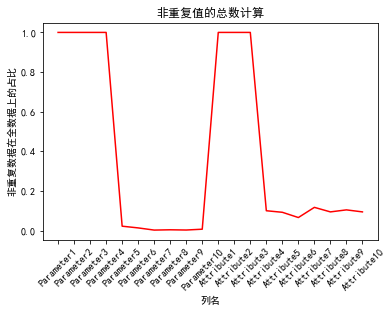

In [12]:
# 获取列名
col_name = train_data.drop(['Quality_label'],1).columns
Notdlts_count = []
for i in col_name:
    # 计算非重复值的个数
    Notdlts = len(train_data[i].drop_duplicates())/6000
    Notdlts_count.append(Notdlts)


plt.plot(col_name, Notdlts_count, c='r')
plt.title('非重复值的总数计算')                 # 标题
plt.xlabel('列名')                        # x轴 的轴名
plt.ylabel('非重复数据在全数据上的占比')  # y轴 的轴名
plt.xticks(rotation=45)                   # 旋转 x轴的刻度名
plt.show()

## 得到的结论是什么？
由上图可得 Parameter 5 - 10 基本为离散特征，而 Attribute4 - 10，有可能是 离散特征，
其余均为连续特征

In [13]:
# 提取出全部的特征
unit = train_data.drop([ 'Quality_label'], 1)

## 数据的分布差异（对应于上一节课中（pandas_profiling）中的警告（skew）)

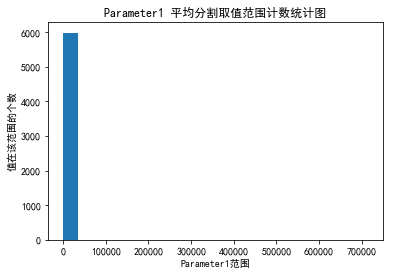

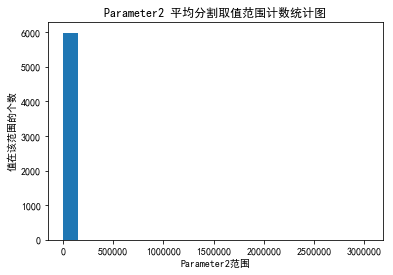

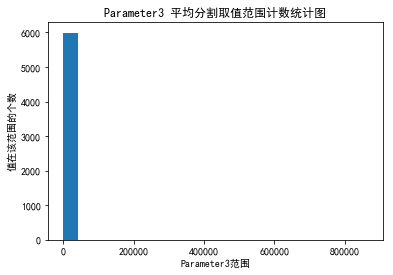

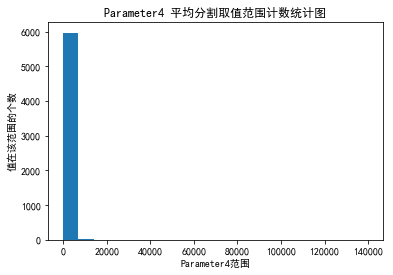

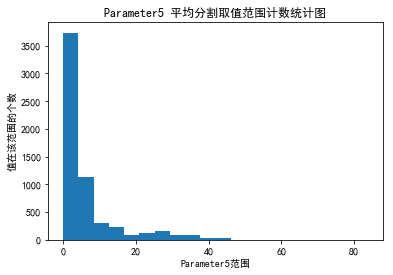

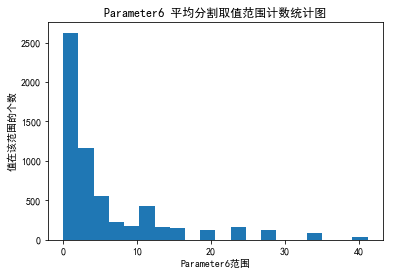

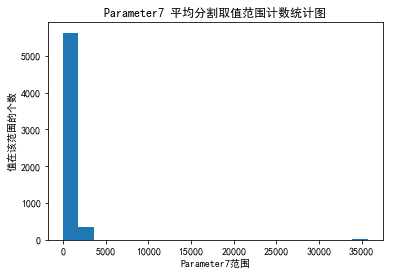

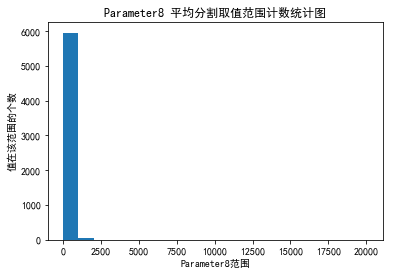

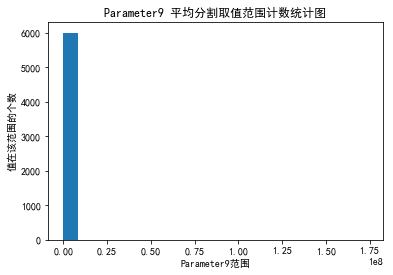

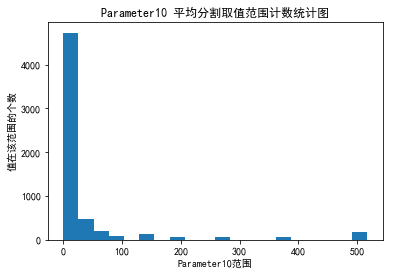

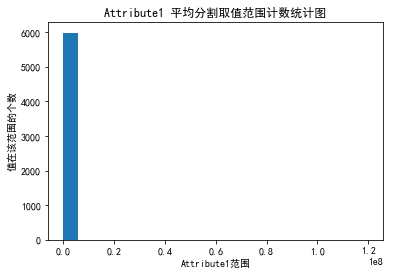

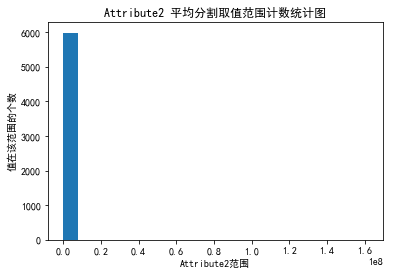

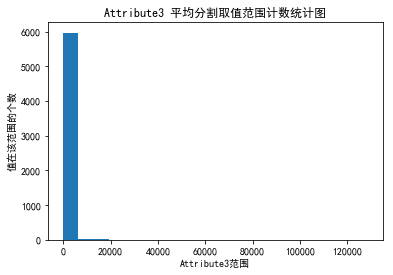

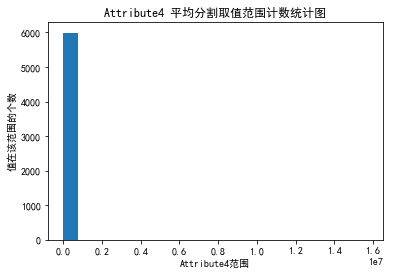

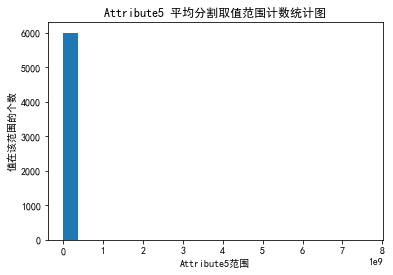

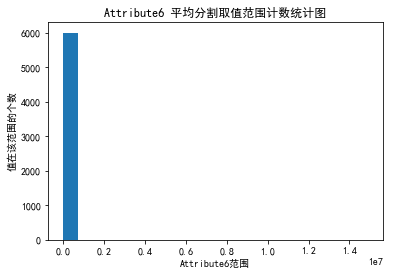

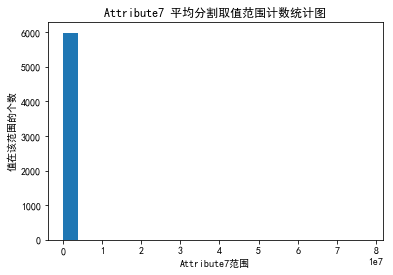

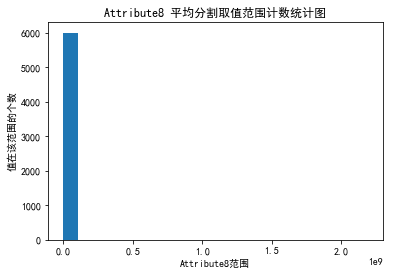

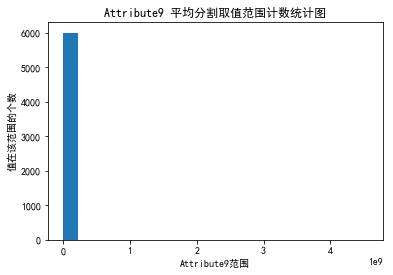

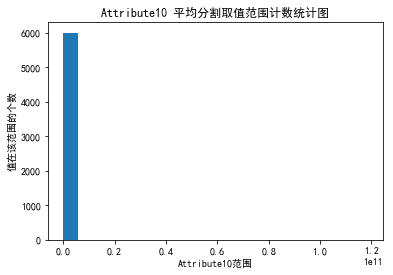

In [14]:
# 遍历列名
for i in col_name:
    plt.hist(unit[i], bins=20)
    plt.title('%s 平均分割取值范围计数统计图'%i)
    plt.xlabel('%s范围'%i)
    plt.ylabel('值在该范围的个数')
    plt.show()

## 这里得到的结论是什么？
由以上图表可以看出 大部分的值 全部聚集在左侧（靠近于0），分布不均匀
数据分布不均衡--接下来要怎么做？--去偏

## 数据的离散程度--看数据的标准差

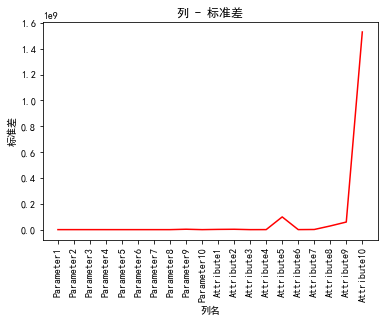

In [15]:
# 获取列名
col_name = unit.columns

# 计算 标准差(std)
col_std = unit.describe().T['std']
    
plt.plot(col_name, col_std, c='red')  # 作图
plt.title('列 - 标准差')     # 标题
plt.xlabel('列名')           # x轴 的轴名
plt.ylabel('标准差')         # y轴 的轴名
plt.xticks(rotation=90)      # 旋转 x轴的刻度名
plt.show()

## 得到结论：
由上图可得： 列 Attribute10 标准差太高，导致无法明显分辨其他列的标准差

怎么做？-->开根号还是取对数？

## 数据的标签处理

In [16]:
lb = LabelEncoder()

train_data["Quality_label"] = lb.fit_transform(train_data["Quality_label"])

## 拿到数据之后的常规操作也是要必须进行的操作---都是要和背景相关的东西与知识相结合一起来做
1、
2、|
3、
4、
5、

## 2、特征工程-->为了解决（数据探索性分析所出现的问题）--结合背景来做，知识点也就那么一点

## 去偏：解决办法：通过 开N方(取2,3,4都可以，不建议过大，这里以 4为例) 的方式，将 0-1 的值增大，并缩小 大于1的值


In [28]:
unit[col_name] = unit[col_name]**(1/4)

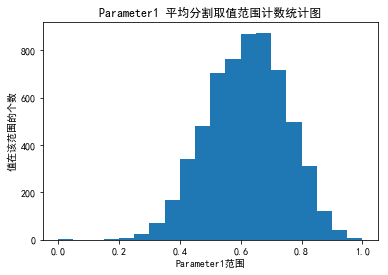

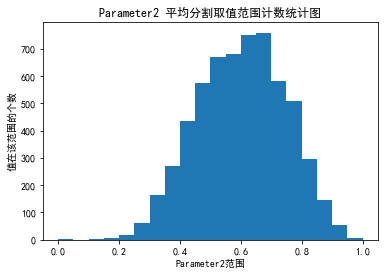

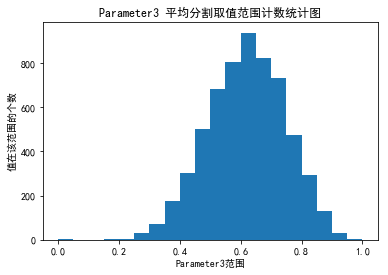

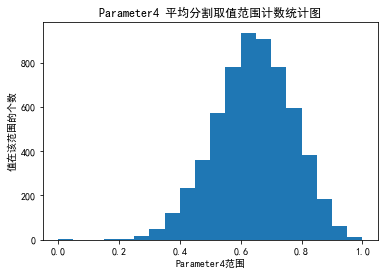

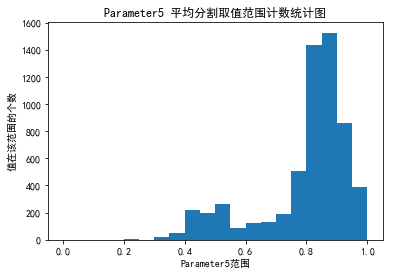

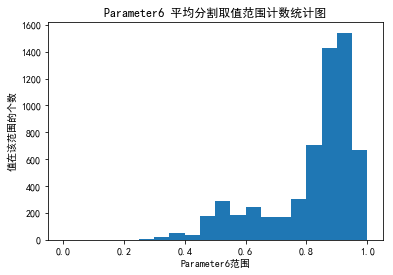

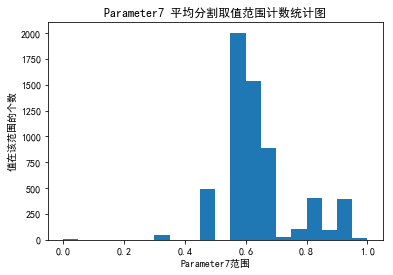

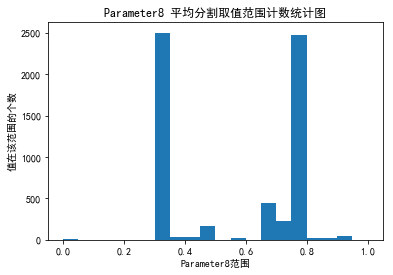

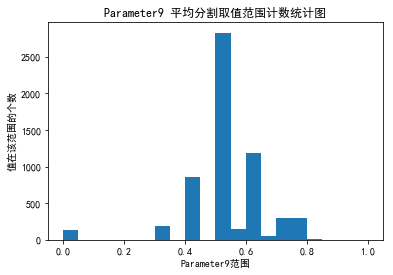

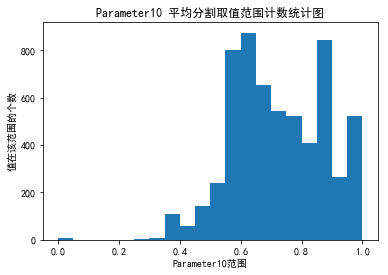

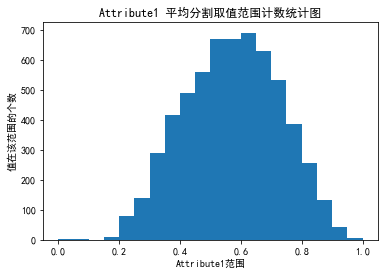

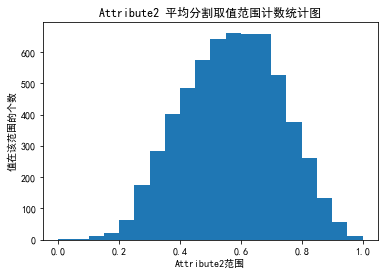

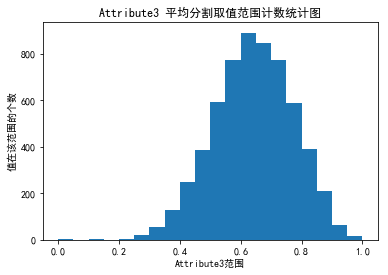

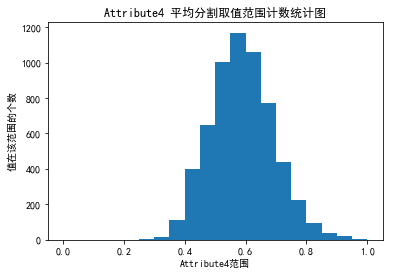

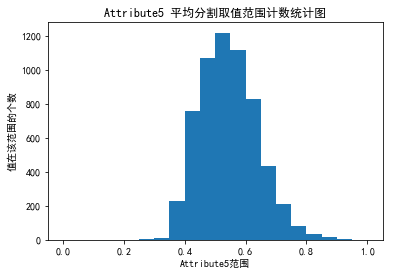

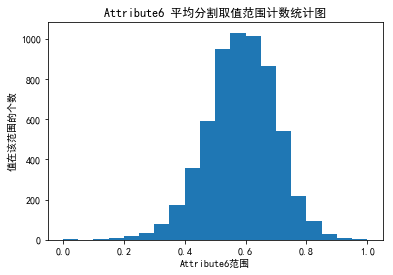

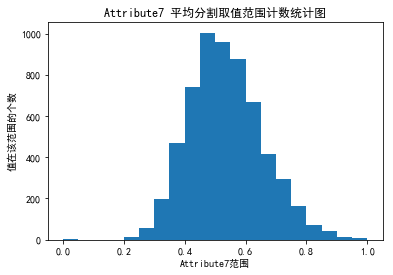

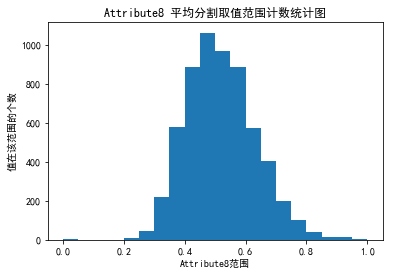

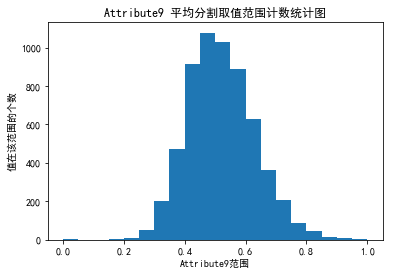

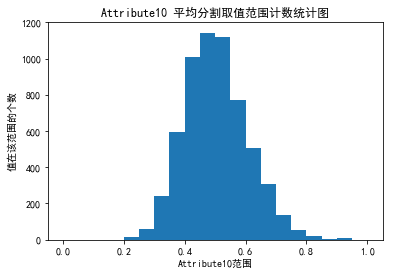

In [29]:
# 遍历列名
for i in col_name:
    plt.hist(unit[i], bins=20)
    plt.title('%s 平均分割取值范围计数统计图'%i)
    plt.xlabel('%s范围'%i)
    plt.ylabel('值在该范围的个数')
    plt.show()

## 去除数据的标准差

解决办法： 将 标准差 进行开N次方，再观察图像

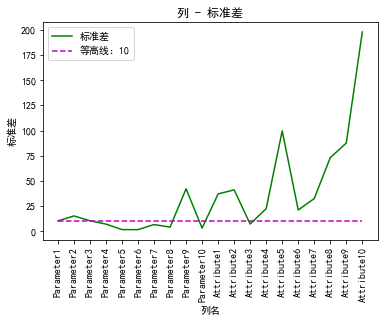

In [19]:
# 此处选择 开4次方 (一般在2-10之间)
plt.plot(col_name, col_std**(1/4), c='g')  # 作图
plt.plot(col_name, 10*np.ones((1,20))[0], c='m', linestyle="--")
plt.title('列 - 标准差')     # 标题
plt.xlabel('列名')           # x轴 的轴名
plt.ylabel('标准差')         # y轴 的轴名
plt.xticks(rotation=90)      # 旋转 x轴的刻度名
plt.legend(['标准差','等高线：10'])
plt.show()

通过观察可以看出 绝大多数列 的 标准差已经突破 1e4 ( 10,000 )

解决方法：因为全部的特征取值范围都要 > 0, 所以可以通过log变换
但为了不影响接近于0的小数 故因为 当 x --> 0 时， 有 ln(x+1) --> x 所以：

In [20]:
# np.log() 默认底数为 e
unit[col_name] = np.log(unit[col_name] + 1)

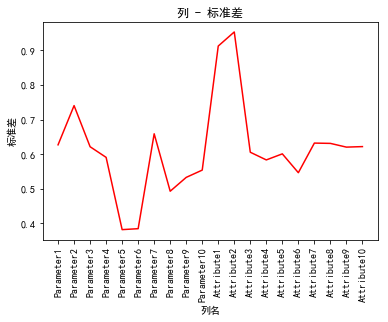

In [21]:
# 计算变换后的 标准差(std)
col_log_std = unit[col_name].describe().T['std']
    
plt.plot(col_name, col_log_std, c='red')  # 作图
plt.title('列 - 标准差')     # 标题
plt.xlabel('列名')           # x轴 的轴名
plt.ylabel('标准差')         # y轴 的轴名
plt.xticks(rotation=90)      # 旋转 x轴的刻度名
plt.show()

从图中可以明显看出 数据的标准差已经稳定在 [0, 1] 这个范围内了, 说明 log变换 很成功

## 特征归一化

In [22]:
for i in unit.columns:
    unit[i] = (unit[i] - unit[i].min()) / (unit[i].max() - unit[i].min())

## 特征选择

In [26]:
# 设置卡方检验，选择k=14个最佳特征
test = SelectKBest(score_func=chi2, k=14) ##选择成最后的十四个特征
# 进行检验
fit = test.fit(unit, train_data['Quality_label'])  
# 打印卡方检验值
print(fit.scores_)  

[9.03534659e-02 2.18659275e-01 1.99045756e-01 4.26276408e-02
 4.59123720e+01 5.97005709e+01 2.25101436e+01 3.18324532e+01
 1.70744842e+01 1.31700513e+01 7.08908231e-01 2.03169072e-01
 9.03993318e-01 2.59665205e+02 1.08218663e+02 9.44179389e+01
 1.25130378e+02 9.88788120e+01 5.44681184e+01 2.29166885e+01]


In [27]:
train = pd.DataFrame(fit.transform(unit),columns=['V{0}'.format(i) for i in range(1, 15)])
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,0.037294,0.048259,0.746448,0.010191,0.086163,0.284598,0.177750,0.263020,0.145132,0.208764,0.294173,0.275910,0.094971,0.028576
1,0.049367,0.077990,0.746448,0.010191,0.086163,0.284598,0.083976,0.352402,0.074880,0.604805,0.132747,0.158370,0.077633,0.102948
2,0.049367,0.072964,0.746448,0.010191,0.086163,0.284598,0.444283,0.148363,0.044652,0.353451,0.031298,0.066901,0.180882,0.081025
3,0.049367,0.077990,0.746448,0.010191,0.086163,0.284598,0.049144,0.110466,0.032663,0.338438,0.019995,0.050035,0.173177,0.028917
4,0.049367,0.077990,0.746448,0.010191,0.086163,0.284598,0.373164,0.086719,0.023719,0.343419,0.028865,0.011989,0.150133,0.139635
